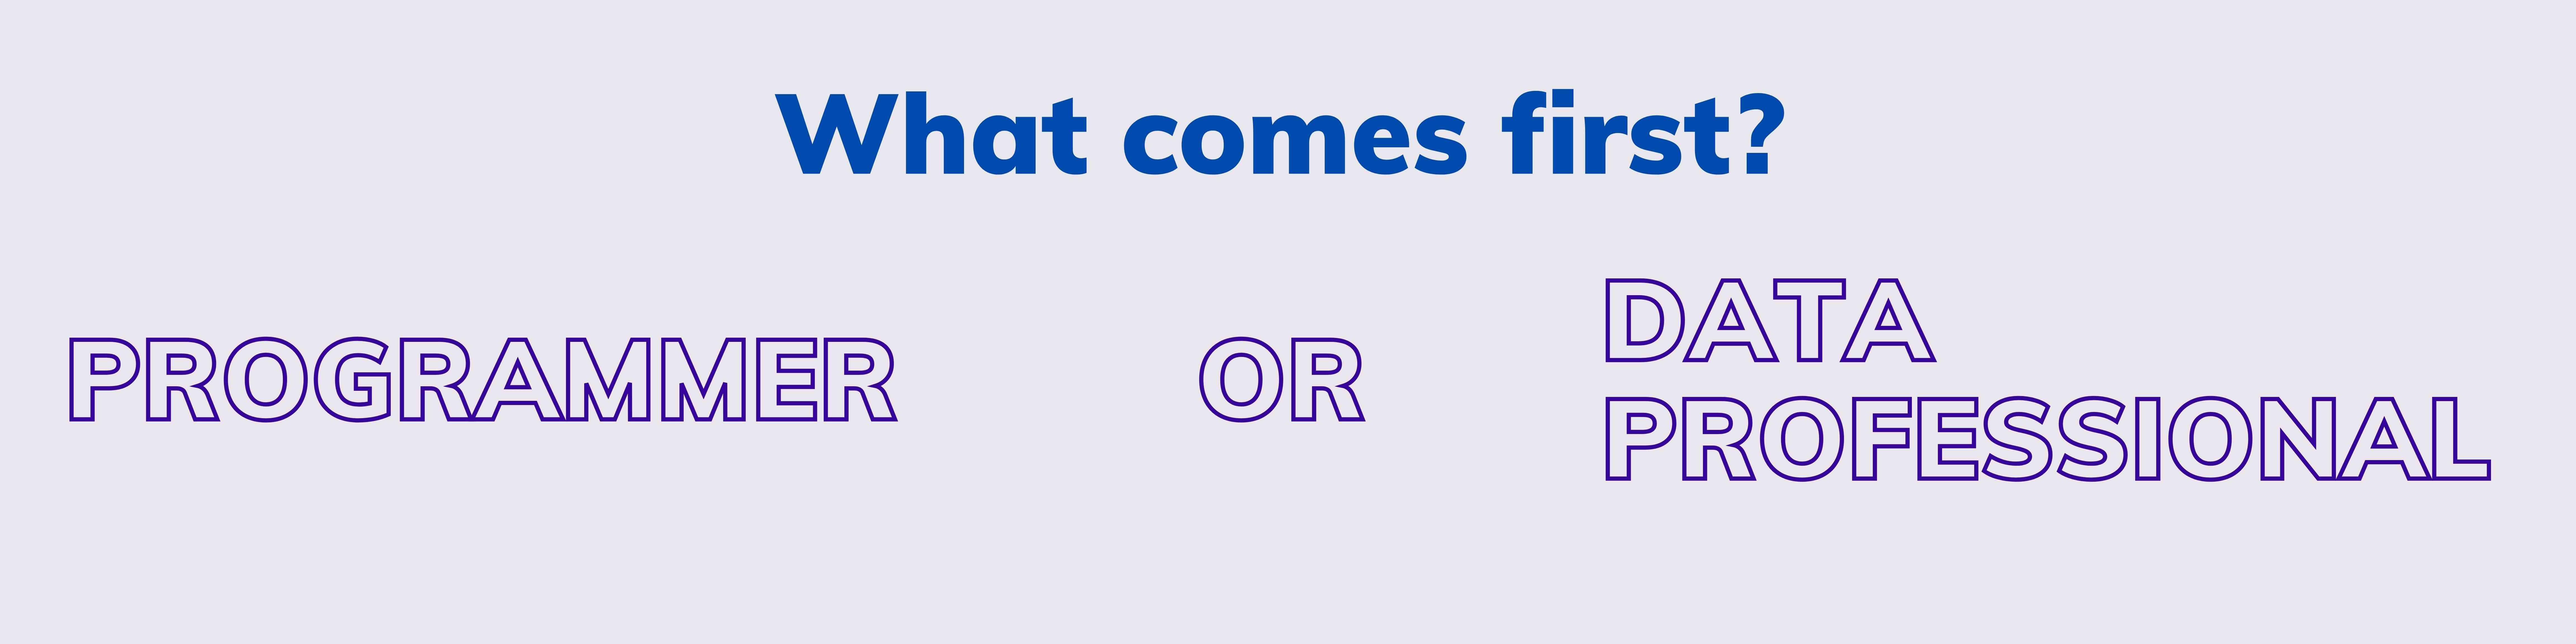

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
df_2020  = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

# <font color='darkgrey'>Introduction</font> 


Dear fellow Kagglers, please find below my very first Kaggle notebook. 

As so many others this year, I have also started to work from home in March. Although this year has been messed up on many levels, it did gave me back some time that would have been wasted otherwise on commuting. 

Taking advantage of the extra time in my hands, I have started to get into a long-time aspiration: learn python and taste the sweet taste of data science. I have started my journey this year by learning python basics and it seems, that generally people tend to first learn a programming language and then dive into the data sciences and become some sort of data professional.

With this notebook, I wish to analyze if this is the case of the survey participants as well? Do participants tend to be data scientist before programmers, or the other way around?

We have 20036 survey responses and 35+ questions. Responses to multiple choice questions (only a single choice can be selected) were recorded in individual columns, so this is why we have 355 columns in total.

In [ ]:
df_2020['Q6'].value_counts()

In [ ]:
df_2020.info()

In [ ]:
df_2020_count_pr = df_2020.copy()
df_2020_count_pr.head(3)

First we can see, there are 2 specific survey questions of interest to analyze my premise.

**Q6 - For how many years have you been writing code**

and

**Q15 - For how many years have you used machine learning methods?**

I know, that not all data professionals use machine learning methods, but for the purpose of this analysis I could not find other, more suitable question.

In [ ]:
df_2020_count_pr = df_2020_count_pr['Q6'].fillna(0).replace(to_replace =  [0, '20+ years','10-20 years','1-2 years','5-10 years','3-5 years','I have never written code', '< 1 years','NaN'], 
                                                                 value =['0','20+','10-20','1-2','5-10','3-5','0', '1', '0'])
df_2020_count_pr = df_2020_count_pr.drop(df_2020_count_pr.index[0])

# <font color='grey'>Investigation of programing experience</font> 

In my analysis, I have split the coders into "**Novice**" and "**Masters**", based on the responses given to Q6. 

Programmers with:
* **0-2 years** programming experience were **Novice**, 
* whereas those with **3-20+ years** experience were **Masters**.

In [ ]:
#df_2020['Q6']  = df_2020['Q6'].fillna(0)
df_2020['Q6'].value_counts()

df_novice1 = df_2020[(df_2020['Q6']=='1-2 years')]
df_novice2 = df_2020[(df_2020['Q6']=='< 1 years')]
df_novice3 = df_2020[(df_2020['Q6']=='I have never written code')]
df_novice4 = df_2020[(df_2020['Q6']==0)]

df_novice = pd.concat([df_novice1, df_novice2, df_novice3, df_novice4], axis=0, sort=False)
df_novice['category'] = "Novice"

In [ ]:
df_2020['Q6'].value_counts()

df_master1 = df_2020[(df_2020['Q6']=='3-5 years')]
df_master2 = df_2020[(df_2020['Q6']=='5-10 years')]
df_master3 = df_2020[(df_2020['Q6']=='10-20 years')]
df_master4 = df_2020[(df_2020['Q6']=='20+ years')]

df_master = pd.concat([df_master1, df_master2, df_master3, df_master4], axis=0, sort=False)
df_master['category'] = "Master"

In [ ]:
df_2020_category = pd.concat([df_master, df_novice])
#df_2020_category['coder_perc']= df_2020_category['category']/df_2020_category['category'].sum()
df_2020_category['category'].value_counts()

As we see below, this actually gives us a close to 50-50% split.

In [ ]:
df_2020_category['category'].value_counts(normalize=True) * 100

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

color_ds = sns.color_palette("mako")

#df_2020_count = df_2020_category['Q6'].fillna(0).replace(to_replace = [0,'20+ years','10-20 years','1-2 years','5-10 years','3-5 years','I have never written code','< 1 years','NaN'], value =['0','20+','10-20','1-2','5-10','3-5','0', '1', '0'])
#df_2020_count = df_2020_count.drop(df_2020_count.index[0])
df_2020_category ['Q6'] = df_2020_count_pr
df_2020_category.dropna()
group = df_2020_category.groupby("category")
ax = sns.countplot(df_2020_category['Q6'],
                   palette='BuPu',
                   order = ['0', '1', '1-2', '3-5', '5-10', '10-20', '20+'],
                   hue=df_2020_category['category'],
                   dodge =False)

ax.set(xlabel='Years of coding experience', ylabel='Count')
ax.set_title("Figure 1. Master vs Novice programer")
plt.show()

It is obvious from the above Figure, that most of survey respondents have at least 1 year experience in coding.

## <font color='grey'>Profesional experience</font> 

Let's see how the professional career changes with coding experience

In [ ]:
data_q5_category = df_2020_category[df_2020_category['category'] != 'ETC'].groupby(['category'])['Q5'].value_counts().unstack().sort_index()
q5_concat = pd.concat([data_q5_category.loc['Novice'], data_q5_category.loc['Master']], axis=1, sort=False)
q5_concat['Master'] = q5_concat['Master'] .div(q5_concat['Master'] .sum(axis=0), axis=0).mul(100).round(3)
q5_concat['Master'] = q5_concat['Master']*(-1)
q5_concat['Novice'] = q5_concat['Novice'] .div(q5_concat['Novice'] .sum(axis=0), axis=0).mul(100).round(3)

In [ ]:
q5_concat = q5_concat.sort_values('Novice')
ax = q5_concat[['Novice','Master']].plot(kind = 'bar', 
                                         figsize=(10, 10), 
                                         stacked = True,
                                         color = ['#810f7c','#e0ecf4'], 
                                         edgecolor = "grey", 
                                         linewidth = 0.5)
x_offset = -0.03
y_offset_master = -2
y_offset_novice = 2

for p in ax.patches:
    b = p.get_bbox()
    if b.y1 > 0:
        val = "{:.1f}".format(b.y1 + b.y0)
        ax.annotate(val, 
                    ((b.x0 + b.x1)/2 + x_offset, 
                     b.y1 + y_offset_novice),               
                    va = 'center', 
                    ha='center',
                    fontweight='light', 
                    fontfamily='serif')
    else:
        val = "{:.1f}".format(b.y1*(-1) + b.y0)
        ax.annotate(val, 
                    ((b.x0 + b.x1)/2 + x_offset, 
                     b.y1 + y_offset_master),                
                    va = 'center', 
                    ha='center',
                    fontweight='light', 
                    fontfamily='serif')
    
ax.set(xlabel=' ', ylabel='Percentage (%)')
ax.legend()
ax.set_title("Figure 2. Job title of novice vs master coders")
plt.show()

As we see in Figure 2, *Novice programers* are mostly **Students**. This is the most recurrent answer (37.5%) among the Novice programmers to question 5. It is also arguable, that **Student** is not really a job title. In the survey design I can understand, how Students are recorded under this category, because persons who are still undergoing the educational system, are not unemployed either.

The difference in percentage is quite big between the first and second most recurring answer (11.6%): **Currently not employed**.

We can see that Data professional job titles start to appear already in the 4th and 5th category: **Data analyst, Data scientist** respectively. 

For *Master programers*, I can see at a first glance, that data is more evenly disperced, the diference between the ranks is not too abrupt. Also, surprise surprise, the first rank job title, with 18.7% is **Data scientist**, closely followed by **Student**, and **Software engineer**.

In [ ]:
df_novice1 = df_2020[(df_2020['Q6']=='1-2 years')]
df_novice2 = df_2020[(df_2020['Q6']=='< 1 years')]
df_novice0 = df_2020[(df_2020['Q6']=='I have never written code')]
df_novice4 = df_2020[(df_2020['Q6']==0)]

df_novice_1_2 = pd.concat([df_novice1, df_novice2], axis=0, sort=False)
df_novice_0 = pd.concat([df_novice0, df_novice4], axis=0, sort=False)

In [ ]:
df_novice_1_2

In [ ]:
df_novice_0

If we further dig into the Novice programer category we see that 7818 Novice programers have 1-2 years coding experience, while 2040 of survey respondents have no coding experience. 

In [ ]:
ax = sns.countplot(df_novice_1_2['Q5'],
                   palette="BuPu",
                   order = df_novice_1_2['Q5'].value_counts().index)
ax.set(xlabel=' ', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Figure 3. Job title of novice programers with 1-2 years experience")

In [ ]:
ax = sns.countplot(df_novice_0["Q5"],
                   palette="BuPu",
                   order = df_novice_0['Q5'].value_counts().index)
ax.set(xlabel=' ', ylabel='Count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Figure 4. Job title of novice coders with 0 coding experience")
plt.show()

In Figure 3 and Figure 4, we can see that with minimal to 0 coding experience there are some kaggle survey respondets who managed to get a Data professional job! Good for them! Well done fellow kagglers!
If we check the count#, about **100 users with 0 coding experience** got *Data analyst* job, whereas **900 users with 1-2 coding experience** got *Data analyst* job.

Bear in mind, that *Data analysts* are not always required computer science knowledge and experience, but we can also see, that about the same number of respondents with 0 to 1-2 years coding experience have Data scientist jobs. *Data science* jobs usually requires SQL, python and/or R programming skills, so it is great, to see talented peaople that are able to get into the field so early on.

In **Question 15**  respondents are asked about the ML experience, so let's see below, how this relates to the coding experience.

# <font color='grey'>Investigation of Machine learning (ML) experience</font> 

Similarly to the categorization of coding experience, let's define **Novice Machine learners** and **Master Machine learners**

Respondets with:
* **0-2 years** ML experience were **Novice**, 
* whereas those with **3-20+ years** ML experience were **Masters**.

In [ ]:
df_2020['Q15']  = df_2020['Q15'].fillna(0)
df_2020['Q15'].value_counts()
 
df_novice0 = df_2020[(df_2020['Q15']=='Under 1 year')]
df_novice1 = df_2020[(df_2020['Q15']=='1-2 years')]
df_novice2 = df_2020[(df_2020['Q15']=='I do not use machine learning methods')]
df_novice3 = df_2020[(df_2020['Q15']==0)]

df_novice_ds = pd.concat([df_novice0, df_novice1, df_novice2, df_novice3], axis=0, sort=False)
df_novice_ds['category_ds'] = "ML Novice"


df_master0 = df_2020[(df_2020['Q15']=='2-3 years')]
df_master1 = df_2020[(df_2020['Q15']=='3-4 years')]
df_master2 = df_2020[(df_2020['Q15']=='4-5 years')]
df_master3 = df_2020[(df_2020['Q15']=='5-10 years')]
df_master4 = df_2020[(df_2020['Q15']=='10-20 years')]
df_master5 = df_2020[(df_2020['Q15']=='20 or more years')]

df_master_ds = pd.concat([df_master0, df_master1, df_master2, df_master3, df_master4, df_master5], axis=0, sort=False)
df_master_ds['category_ds'] = "ML Master"

We can imediately see, that while the same split definition granted us a close to 50-50% Novice vs Master programmers, with machine learning experience this split yelds us a **77% ML Novice** vs a **22% ML Master**. 

In [ ]:
df_2020_category_ds = pd.concat([df_master_ds, df_novice_ds])
df_2020_category_ds['category_ds'].value_counts(normalize=True) * 100

In [ ]:
df_2020_count_ds = df_2020_category_ds['Q15'].fillna(0).replace(to_replace = 
                                                             [0,'20 or more years',
                                                              '10-20 years','1-2 years',
                                                              '5-10 years','4-5 years',
                                                              'Under 1 year',
                                                              'I do not use machine learning methods','NaN','2-3 years', '3-4 years'],
                                                             value =['0','20+','10-20','1-2','5-10','4-5','1','0', '0', '2-3', '3-4'])
df_2020_count_ds = df_2020_count_ds.drop(df_2020_count_ds.index[0])
df_2020_category_ds['Q15'] = df_2020_count_ds
df_2020_category_ds.fillna(0)
group = df_2020_category_ds.groupby("category_ds")
ax = sns.countplot(df_2020_category_ds['Q15'],
                   palette='BuPu',
                   order = ['0', '1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20', '20+'],
                   hue=df_2020_category_ds['category_ds'],
                   dodge =False)
#order = ['0', '1' '1-2', '2-3', '3-4' '4-5', '5-10', '10-20', '20+'],
ax.set(xlabel='Years of ML experience', ylabel='Count')
ax.set_title("Figure 5. Master vs Novice Machine learning")
plt.show()

The disproportion between ML Master vs ML Novice can be observed in Figure 5 as well.

It is also worth noting, that we have  about 5000+ fewer **ML Master** respondents, compared to **Master programmers**. This can be probably explained with the novelty of the Machine learning and Data sciences. As these fields just start to develop under our eyes, it is not surprising we rarely see ML experts with 20+ years experience. Not to mention, that "Data science" was not even in the vocabulary 10-20+ years ago.

In [ ]:
df_2020_count_pr_heat = pd.concat([df_2020_count_pr, df_2020_category["category" ]], axis=1, sort=False)
df_2020_count_ds_heat = pd.concat([df_2020_count_ds, df_2020_category_ds["category_ds" ]], axis=1, sort=False)


df_heatmap = pd.concat([df_2020_count_ds_heat, df_2020_count_pr_heat], axis=1)

df_heatmap_replace=(df_heatmap.replace(to_replace =  [0, '1','1-2', '2-3', '3-4', '4-5', '3-5', '5-10', '10-20', '20+'], 
                                       value = [0,        1,   2,    3,     3,     3,     3,    4,     5,    6]))

df_heatmap_replace=df_heatmap_replace.dropna()
df_heatmap_replace = df_heatmap_replace[["Q6", "Q15"]] = df_heatmap_replace[["Q6", "Q15"]].apply(pd.to_numeric)
df_heatmap_replace = df_heatmap_replace
df_heatmap_replace = df_heatmap_replace.sort_values('Q15')
df_heatmap_replace = df_heatmap_replace.reset_index().reset_index()

data_q15_category = df_heatmap[df_heatmap['category'] != 'ETC'].groupby(['category'])['Q15'].value_counts().unstack().sort_index()
q15_concat = data_q15_category.transpose()
q15_concat = pd.concat([data_q15_category.loc['Novice'], data_q15_category.loc['Master']], axis=1, sort=False)
q15_concat['Master'] = q15_concat['Master'] .div(q15_concat['Master'] .sum(axis=0), axis=0).mul(100).round(3)
q15_concat['Master'] = q15_concat['Master']*(-1)
q15_concat['Novice'] = q15_concat['Novice'] .div(q15_concat['Novice'] .sum(axis=0), axis=0).mul(100).round(3)
q15_concat = q15_concat.reindex(['0', '1', '1-2', '2-3','3-4','4-5', '5-10', '10-20', '20+'])


In [ ]:
ax = q15_concat.plot(kind = 'bar', 
                                         figsize=(10, 6), 
                                         stacked = True,
                                         color = ['#810f7c','#e0ecf4'], 
                                        
                                         edgecolor = "grey", 
                                         linewidth = 0.5)
x_offset = -0.001
y_offset_master = -2
y_offset_novice = 2

for p in ax.patches:
    b = p.get_bbox()
    if b.y1 > 0:
        val = "{:.2f}".format(b.y1 + b.y0)
        ax.annotate(val, 
                    ((b.x0 + b.x1)/2 + x_offset, 
                     b.y1 + y_offset_novice),               
                    va = 'center', 
                    ha='center',
                    fontweight='light', 
                    fontfamily='serif')
    else:
        val = "{:.2f}".format(b.y1*(-1) + b.y0)
        ax.annotate(val, 
                    ((b.x0 + b.x1)/2 + x_offset, 
                     b.y1 + y_offset_master),                
                    va = 'center', 
                    ha='center',
                    fontweight='light', 
                    fontfamily='serif')
    
ax.set(xlabel='Years of ML experience', ylabel='Percentage (%)')
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_title("Figure 6. ML experience of Novice vs Master programmers")
plt.show()

While it was possible for a Novice programmer to get a Data Analyst and Data scientist jobs, ML related tasks are much more heavily based on coding knowlegde. As shown in Figure 6, Novice programmers usually have 0 to 1-2 years ML experience. In other words, Novice programmers are usually Novice Machine learners as well. It goes hand in hand and it seems logical to be so. I also fall into the Novice programmer, Novice machine learner category, together with about 50% of the survey respondents.

Can we observe anything else from Figure 6? Well yes! The plot for Master programmers, is skewed to the right, it is not a normal gaussian distibution, but it is much less skewed than the one for Novice coders. About 56% of Master coders are Novice Machine learners. As I wrote earlier, this can be probably explained by the nowelty of the field. While experimented programers are just staring to reorient their area of interest, it is also worth mentioning, that a Master programmer, will grasp the ML knowledge and algorithms much faster than someone who is new to both CS and ML.

In [ ]:
job_counts = pd.DataFrame(df_heatmap['Q6'].value_counts()).reset_index()
job_counts.columns = ['Q6', 'count']

q15 = df_heatmap[['Q6','Q15']]


q15_summary = pd.DataFrame((q15.groupby('Q6')['Q15'].value_counts()))#.iloc[1:])
q15_summary.columns = ['resp']
q15_summary.reset_index(inplace=True)


q15_summary = q15_summary.merge(job_counts, how='left', on='Q6')
q15_summary['pos'] = ((q15_summary['resp']/q15_summary['count'])*100).round(decimals=1)
#q15_summary = q15_summary.drop(52)


q15_piv = q15_summary.pivot('Q15', 'Q6', 'pos')
q15_piv = q15_piv[['0','1', '1-2','3-5', '5-10', '10-20','20+']].copy()
q15_piv = q15_piv.loc[[ '20+', '10-20', '5-10', '4-5', '3-4','2-3','1-2', '1', '0',], :]
q15_piv = q15_piv.fillna(0.0)

In [ ]:
def test_table_x():
    data_table = pd.DataFrame({'categories':['Novice CS']*3 + ['Master CS']*4,
                               'years':['0','1', '1-2','3-5', '5-10', '10-20','20+'],
                               'test':[1,2,3,4,5,6,7],#,10,20,5,6,4,7,1],
                               'test1':np.random.randint(0,10,7)
                               })
    return data_table

def test_table_y():
    years = [ '20+', '10-20', '5-10', '4-5', '3-4','2-3','1-2', '1', '0',]
    categories = ['Master ML',]*6 + ['Novice ML',]*3
    tuples = list(zip(years, categories))
    index = pd.MultiIndex.from_tuples(tuples, names=['years', 'Q15 ML'])
    d = {i: [np.random.randint(0,50) for _ in range(9)] for i in range(0, 6)}
    data_table = pd.DataFrame(d, index=index)
    return data_table


def add_line_x(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='grey')
    line.set_clip_on(False)
    ax.add_line(line)
    
    
def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .2], [xpos, xpos], color='grey', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)
    


def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]


def label_group_bar_table_y(ax, df):
    xpos = -.2
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+.1, lypos, label, ha='center', transform=ax.transAxes) 
        add_line(ax, pos*scale , xpos)
        xpos -= .2
    

def label_group_bar_table_x(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line_x(ax, pos*scale, ypos)
            pos += rpos
        add_line_x(ax, pos*scale , ypos)
        ypos -= .1
        
        
df_x = test_table_x().groupby(['categories','years'], sort = False).sum()
df_y = test_table_y()


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
sns.heatmap(q15_piv, 
            annot=True, 
            linewidths=.2, 
            cmap = 'BuPu', 
            cbar_kws={'shrink':1, 'label':'% responses for ML and CS experiences'}, 
            vmin = 0, 
            vmax = 100,
            fmt='g')
plt.xlabel("Programming experience")
plt.ylabel("ML experience",rotation=90)
plt.title("Figure 7. ML vs CS experience - 2020", fontdict = {'fontsize':15}, pad=24)

#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')

label_group_bar_table_x(ax, df_x)
label_group_bar_table_y(ax, df_y)
fig.subplots_adjust(left=.1*df_y.index.nlevels)


plt.show()

As previously discussed in Figure 4, 2040 respondents have 0 coding experience. It is interesting to see, that all **Novice CS** with 0 programing experience, are actually 100% **Novice ML** with 0 Machine lerning experience. 

It is interesting to see in Figure 7, that 90-100% of **Novice CS** are also **Novice ML**. Intuitively I would have said the same thing, but it is great to see numbers acutally matching the intuitive guess.

Respondents with 3-5 years coding experience, in my analysis are **Master CS**, but even in this category ~75% of the respondents are **Novice ML**. 

# Comparing the Master vs Novice evolution over the past few years

In the last section of this notebook, I want to analyze the ML vs CS experience of Kaggle survey respondents over the last 3 years.

From the **2019 Kaggle Survey**, I have used Q15 and Q23 to define the Novice and Master categories, whereas form the **2018 Kaggle Survey**, I have used Q24 and Q25.

In [ ]:
df_2019  = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv')
df_2019['Q15'] = df_2019['Q15'].replace(np.nan, 0)
df_2019['Q23'] = df_2019['Q23'].replace(np.nan, 0)
df_2019['Q15'] = df_2019['Q15'].fillna(0)
df_2019['Q23'] = df_2019['Q23'].fillna(0)

df_2019_novice1 = df_2019[(df_2019['Q15']=='1-2 years')]
df_2019_novice2 = df_2019[(df_2019['Q15']=='< 1 years')]
df_2019_novice3 = df_2019[(df_2019['Q15']=='I have never written code')]
df_2019_novice4 = df_2019[(df_2019['Q15']==0)]

df_2019_novice = pd.concat([df_2019_novice1, df_2019_novice2, df_2019_novice3, df_2019_novice4], axis=0, sort=False)
df_2019_novice['category'] = "Novice"

df_2019_master1 = df_2019[(df_2019['Q15']=='3-5 years')]
df_2019_master2 = df_2019[(df_2019['Q15']=='5-10 years')]
df_2019_master3 = df_2019[(df_2019['Q15']=='10-20 years')]
df_2019_master4 = df_2019[(df_2019['Q15']=='20+ years')]

df_2019_master = pd.concat([df_2019_master1, df_2019_master2, df_2019_master3, df_2019_master4], axis=0, sort=False)
df_2019_master['category'] = "Master"

 
df_2019_novice0 = df_2019[(df_2019['Q23']=='< 1 years')]
df_2019_novice1 = df_2019[(df_2019['Q23']=='1-2 years')]
#df_novice2 = df_2019[(df_2019['Q23']=='I do not use machine learning methods')]
#df_2019_novice3 = df_2019[(df_2019['Q23']=='0')]
df_2019_novice4 = df_2019[(df_2019['Q23']==0)]

df_2019_novice_ds = pd.concat([df_2019_novice0, df_2019_novice1, df_2019_novice4], axis=0, sort=False)
df_2019_novice_ds['category_ds'] = "ML Novice"


df_2019_master0 = df_2019[(df_2019['Q23']=='2-3 years')]
df_2019_master1 = df_2019[(df_2019['Q23']=='3-4 years')]
df_2019_master2 = df_2019[(df_2019['Q23']=='4-5 years')]
df_2019_master3 = df_2019[(df_2019['Q23']=='5-10 years')]
df_2019_master4 = df_2019[(df_2019['Q23']=='10-15 years')]
df_2019_master5 = df_2019[(df_2019['Q23']=='20+ years')]

df_2019_master_ds = pd.concat([df_2019_master0, df_2019_master1, df_2019_master2, df_2019_master3, df_2019_master4, df_2019_master5], axis=0, sort=False)
df_2019_master_ds['category_ds'] = "ML Master"
df_2019_pr = pd.concat([df_2019_novice,df_2019_master], axis=0, sort=False)
df_2019_ds = pd.concat([df_2019_novice_ds,df_2019_master_ds], axis=0, sort=False)
df_2019_count_pr = df_2019['Q15'].fillna(0).replace(to_replace =  [0, 
                                                                   '20+ years',
                                                                   '10-20 years',
                                                                   '1-2 years',
                                                                   '5-10 years',
                                                                   '3-5 years',
                                                                   'I have never written code', 
                                                                   '< 1 years',
                                                                   'NaN'], 
                                                                 value =['0','20+','10-20','1-2','5-10','3-5','0', '1', '0'])
df_2019_count_pr = df_2019_count_pr.drop(df_2019_count_pr.index[0])

df_2019_count_ds = df_2019['Q23'].fillna(0).replace(to_replace = 
                                                             [0,
                                                              '20+ years',
                                                              '10-15 years',
                                                              '1-2 years',
                                                              '5-10 years',
                                                              '4-5 years',
                                                              '< 1 years',
                                                              'I do not use machine learning methods',
                                                              'NaN',
                                                              '2-3 years', 
                                                              '3-4 years'],
                                                             value =['0','20+','10-15','1-2','5-10','4-5','1','0', '0', '2-3', '3-4'])

df_2019_count_ds = df_2019_count_ds.drop(df_2020_count_ds.index[0])
df_heatmap_2019 = pd.concat([df_2019_count_pr, df_2019_count_ds, 
                             df_2019_pr['category'], df_2019_ds['category_ds'], ], axis=1)
job_counts_2019 = pd.DataFrame(df_heatmap_2019['Q15'].value_counts()).reset_index()
job_counts_2019.columns = ['Q15', 'count']

q23_2019 = df_heatmap_2019[['Q15','Q23']]


q23_summary_2019 = pd.DataFrame((q23_2019.groupby('Q15')['Q23'].value_counts()))#.iloc[1:])
q23_summary_2019.columns = ['resp']
q23_summary_2019.reset_index(inplace=True)


q23_summary_2019 = q23_summary_2019.merge(job_counts_2019, how='left', on='Q15')
q23_summary_2019['pos'] = ((q23_summary_2019['resp']/q23_summary_2019['count'])*100).round(decimals=1)
#q15_summary = q15_summary.drop(52)


q23_piv = q23_summary_2019.pivot('Q23', 'Q15', 'pos')

###
q23_piv = q23_piv[['0','1', '1-2','3-5', '5-10', '10-20','20+']].copy()
q23_piv = q23_piv.loc[['20+','10-15','5-10','4-5', '3-4', '2-3', '1-2', '1', '0'], :]
q23_piv = q23_piv.fillna(0)

In [ ]:
df_2018  = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv')
df_2018['Q24'] = df_2018['Q24'].replace(np.nan, 0)
df_2018['Q25'] = df_2018['Q25'].replace(np.nan, 0)
df_2018['Q24'] = df_2018['Q24'].fillna(0)
df_2018['Q25'] = df_2018['Q25'].fillna(0)

df_2018_novice1 = df_2018[(df_2018['Q24']=='1-2 years')]
df_2018_novice2 = df_2018[(df_2018['Q24']=='< 1 year')]
df_2018_novice3 = df_2018[(df_2018['Q24']=='I have never written code but I want to learn')]
df_2018_novice4 = df_2018[(df_2018['Q24']==-0)]
df_2018_novice5 = df_2018[(df_2018['Q24']=='I have never written code and I do not want to learn')]

df_2018_novice = pd.concat([df_2018_novice1, df_2018_novice2, df_2018_novice3, df_2018_novice4, df_2018_novice5], axis=0, sort=False)
df_2018_novice['category'] = "Novice"

df_2018_master1 = df_2018[(df_2018['Q24']=='3-5 years')]
df_2018_master2 = df_2018[(df_2018['Q24']=='5-10 years')]
df_2018_master3 = df_2018[(df_2018['Q24']=='10-20 years')]
df_2018_master4 = df_2018[(df_2018['Q24']=='20+ years')]
df_2018_master5 = df_2018[(df_2018['Q24']=='20-30 years')]
df_2018_master6 = df_2018[(df_2018['Q24']=='30-40 years')]
df_2018_master7 = df_2018[(df_2018['Q24']=='40+ years')]

df_2018_master = pd.concat([df_2018_master1, df_2018_master2, df_2018_master3, 
                            df_2018_master4, df_2018_master5, df_2018_master6, df_2018_master7], axis=0, sort=False)
df_2018_master['category'] = "Master"

 
df_2018_novice0 = df_2018[(df_2018['Q25']=='< 1 year')]
df_2018_novice1 = df_2018[(df_2018['Q25']=='1-2 years')]
df_2018_novice2 = df_2018[(df_2018['Q25']=='I have never studied machine learning but plan to learn in the future')]
df_2018_novice3 = df_2018[(df_2018['Q25']=='I have never studied machine learning and I do not plan to')]
df_2018_novice4 = df_2018[(df_2018['Q25']==0)]
df_2018_novice5 = df_2018[(df_2018['Q25']=='0')]

df_2018_novice_ds = pd.concat([df_2018_novice0, df_2018_novice1, df_2018_novice2, df_2018_novice3, df_2018_novice4, df_2018_novice5], axis=0, sort=False)
df_2018_novice_ds['category_ds'] = "ML Novice"


df_2018_master0 = df_2018[(df_2018['Q25']=='2-3 years')]
df_2018_master1 = df_2018[(df_2018['Q25']=='3-4 years')]
df_2018_master2 = df_2018[(df_2018['Q25']=='4-5 years')]
df_2018_master3 = df_2018[(df_2018['Q25']=='5-10 years')]
df_2018_master4 = df_2018[(df_2018['Q25']=='10-15 years')]
df_2018_master5 = df_2018[(df_2018['Q25']=='20+ years')]

df_2018_master_ds = pd.concat([df_2018_master0, df_2018_master1, df_2018_master2, df_2018_master3, df_2018_master4, df_2018_master5], axis=0, sort=False)
df_2018_master_ds['category_ds'] = "ML Master"

df_2018_pr = pd.concat([df_2018_novice,df_2018_master], axis=0, sort=False)
df_2018_ds = pd.concat([df_2018_novice_ds,df_2018_master_ds], axis=0, sort=False)

df_2018_count_pr = df_2018['Q24'].fillna(0).replace(to_replace =  [0, 
                                                                   '40+ years',
                                                                   '10-20 years',
                                                                   '1-2 years',
                                                                   '5-10 years',
                                                                   '3-5 years',
                                                                   '20-30 years',
                                                                   '30-40 years',
                                                                   'I have never written code but I want to learn', 
                                                                   'I have never written code and I do not want to learn',
                                                                   '< 1 year',
                                                                   ], 
                                                                 value =['0','40+','10-20','1-2','5-10','3-5','20-30', '30-40',
                                                                         '0','0', '1'])
df_2018_count_pr = df_2018_count_pr.drop(df_2019_count_pr.index[0])

df_2018_count_ds = df_2018['Q25'].fillna(0).replace(to_replace = 
                                                             [0,
                                                              '20+ years',
                                                              '10-15 years',
                                                              '1-2 years',
                                                              '5-10 years',
                                                              '4-5 years',
                                                              '< 1 year',
                                                              'I have never studied machine learning but plan to learn in the future',
                                                              'I have never studied machine learning and I do not plan to',

                                                              '2-3 years', 
                                                              '3-4 years'],
                                                             value =['0','20+','10-15','1-2','5-10','4-5','1',
                                                                     '0',  '0', '2-3', '3-4'])

df_2018_count_ds = df_2018_count_ds.drop(df_2020_count_ds.index[0])

df_heatmap_2018 = pd.concat([df_2018_count_pr, df_2018_count_ds, 
                             df_2018_pr['category'], df_2018_ds['category_ds'], ], axis=1)
job_counts_2018 = pd.DataFrame(df_heatmap_2018['Q24'].value_counts()).reset_index()
job_counts_2018.columns = ['Q24', 'count']

q25_2018 = df_heatmap_2018[['Q24','Q25']]

q25_2018 = q25_2018.fillna(0)
q25_summary_2018 = pd.DataFrame((q25_2018.groupby('Q24')['Q25'].value_counts()))#.iloc[1:])
q25_summary_2018.columns = ['resp']
q25_summary_2018.reset_index(inplace=True)


q25_summary_2018 = q25_summary_2018.merge(job_counts_2018, how='left', on='Q24')
q25_summary_2018['pos'] = ((q25_summary_2018['resp']/q25_summary_2018['count'])*100).round(decimals=1)
#q15_summary = q15_summary.drop(52)


q25_piv = q25_summary_2018.pivot('Q25', 'Q24', 'pos')


q25_piv = q25_piv[['0','1', '1-2','3-5', '5-10', '10-20', '20-30', '30-40', '40+']].copy()
q25_piv = q25_piv.loc[['20+','10-15','5-10','4-5', '3-4', '2-3', '1-2', '1', '0'], :]
q25_piv = q25_piv.fillna(0)

In [ ]:
def test_table_2018_x():
    data_table = pd.DataFrame({'categories':['Novice CS']*3 + ['Master CS']*6,
                               'years':['0','1', '1-2','3-5', '5-10', '10-20', '20-30', '30-40', '40+'],
                               'test':[1,2,3,4,5,6,7,8,9],#,10,20,5,6,4,7,1],
                               'test1':np.random.randint(0,10,9)
                               })
    return data_table

def test_table_2018_y():
    years = ['20+','10-15','5-10','4-5', '3-4', '2-3', '1-2', '1', '0']
    categories = ['Master ML',]*6 + ['Novice ML',]*3
    tuples = list(zip(years, categories))
    index = pd.MultiIndex.from_tuples(tuples, names=['years', 'Q15 ML'])
    d = {i: [np.random.randint(0,50) for _ in range(9)] for i in range(0, 6)}
    data_table = pd.DataFrame(d, index=index)
    return data_table
      
        
df_x_2018 = test_table_2018_x().groupby(['categories','years'], sort = False).sum()
df_y_2018 = test_table_2018_y()

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(25,8))
fig.suptitle("Figure 8. Years of ML vs CS experience", fontsize=20)


sns.heatmap(q15_piv, 
            annot=True, 
            linewidths=.2, 
            cmap = 'BuPu', 
            cbar=False,
            fmt='g',
            ax=axes[0])
axes[0].set_title('8a. 2020 Kaggle Survey', fontsize=20)
labels = ['' for item in axes[0].get_xticklabels()]
axes[0].set_xticklabels(labels)
axes[0].set_xlabel('')
labels = ['' for item in axes[0].get_yticklabels()]
axes[0].set_yticklabels(labels)
axes[0].set_ylabel('')
label_group_bar_table_x(axes[0], df_x)
label_group_bar_table_y(axes[0], df_y)
fig.subplots_adjust(left=.1*df_y.index.nlevels)

sns.heatmap(q23_piv, 
            annot=True, 
            linewidths=.2, 
            cmap = 'BuPu', 
           cbar=False,
            fmt='g',
           ax=axes[1])
axes[1].set_title('8b. 2019 Kaggle Survey', fontsize=20)
axes[1].set_ylabel('')
labels = ['' for item in axes[1].get_xticklabels()]
axes[1].set_xticklabels(labels)
axes[1].set_xlabel('')
label_group_bar_table_x(axes[1], df_x)
fig.subplots_adjust(left=.1*df_y.index.nlevels)


sns.heatmap(q25_piv, 
            annot=True, 
            linewidths=.2, 
            cmap = 'BuPu', 
            cbar=False,
            fmt='g',
           ax=axes[2])
axes[2].set_title('8c. 2018 Kaggle Survey', fontsize=20)
axes[2].set_ylabel(' ')
labels = ['' for item in axes[2].get_xticklabels()]
axes[2].set_xticklabels(labels)
axes[2].set_xlabel('')
label_group_bar_table_x(axes[2], df_x_2018)
fig.subplots_adjust(left=.1*df_y_2018.index.nlevels)

plt.show()


Lastly, in Figure 8, we can see a comparison between ML vs CS experience across the years. In 2018 Kaggle Survey, the years of codig (CS) experience is much more divided, and it goes back to upto 40+ years experience, whereas in 2019 and 2020, the upper limit is 20+ years experience.

In Figure 8b and 8c, in the 2019 and 2018 Kaggle surveys, it seems that a few more ML Masters have responded the survey. There seems to be a cluster around respondents with 5-10, 10-20 and 20+ years ML experience, but this cluster is missing in the Figure 8a (2020 Survey). In the 2020 survey, the ML experience is more evenly dispersed for respondents with 5-10, 10-20 and 20+ coding experience. 

## <font color='grey'>Conclusions</font> 

In this notebook I really wanted to analyze if my intuiton and the approach of the majority wanting to break into the data world is backed up by the data from this survey. Is coding experience a must before getting into the data world? Hence, **What comes first? Programmer or data professional**. 

Short answer: yes, coding is strongly advised :). 

Longer answer: As it was expected, minimal coding experience in necessary to get and be successful for the long run in a data related job. As a conclusion there are a few take-home messages I would like to highlight.
* There are some jobs such as **data analyst**, that can be obtained with minimal to no coding experience.
* There are many **students** on Kaggle. Although as argued in Figure 2, Studentship is not a job title, I have a huge respect for students actively learning on Kaggle. What a beautiful way to spend the free time! I wish I was this inspired back in the days :).
* In the 2020 Survey, the **Novice** vs **Master** programming experience definition, provided about **50-50%** data split, whereas the same definition related to ML experience provided a much more imbalaced split **77% ML Novice** vs a **22% ML Master**. It is not surprising to see only a hanfull of very experienced ML experts, as the filed is growing and developing in front of our eyes
* In Figure 7 and 8 it was highlighted that coding experience is absolutely necessary for ML related tasks and jobs. Respondents with **0 coding experience**, have **0 ML experience** as well.

*Personal conclusion:* I have always been a more analytical person, but learning to code this year I feel like I have aquired some extra super-powers. Learning to code really re-structures your brain to think more strategically and be more problem solving oriented. It is not easy at all, but it is worth it. 

## <font color='grey'>References</font> 

1. Kaggle survey dataset - [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018)
2. Kaggle survey dataset - [2019](https://www.kaggle.com/c/kaggle-survey-2019)
3. From StackOverflow, I have used [darthbith's](https://stackoverflow.com/questions/19184484/how-to-add-group-labels-for-bar-charts-in-matplotlib/39502106#39502106) code with some modifications to implement the Novice and Master classification in Figures 7 ans 8. 